# สอน pandas: การสร้าง dummy/one-hot จาก multivalued column
* get_dummies: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

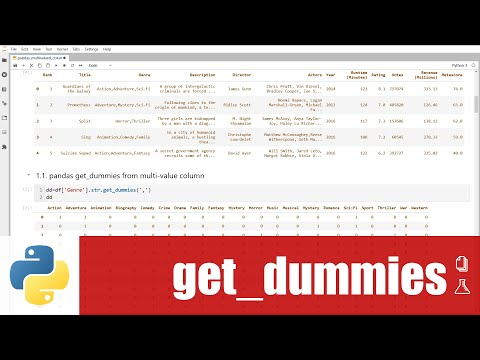

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('4d5XZAsV-sw', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np

In [3]:
print(f'pandas version:  {pd.__version__}')
print(f'numpy  version:  {np.__version__}')

pandas version:  1.1.3
numpy  version:  1.19.2


In [4]:
pd.Timestamp.now()

Timestamp('2020-12-05 11:12:57.873512')

In [5]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/IMDB_Movie_1000_Data.csv'
df=pd.read_csv(url)
df[:5]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## pandas get_dummies from multi-value column

In [6]:
dd=df['Genre'].str.get_dummies(',')
dd

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
998,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df=pd.concat([df, dd], axis='columns')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,1,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,1,0,1,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,1,0,0,0,0,0,0,1,0,0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,...,0,0,0,1,0,0,0,0,0,0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,...,1,0,0,0,0,0,0,0,0,0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,...,0,1,0,0,1,0,0,0,0,0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,...,0,0,0,0,0,0,0,0,0,0


In [8]:
sg=df['Genre'].str.split(',\s*')
sg

0       [Action, Adventure, Sci-Fi]
1      [Adventure, Mystery, Sci-Fi]
2                [Horror, Thriller]
3       [Animation, Comedy, Family]
4      [Action, Adventure, Fantasy]
                   ...             
995         [Crime, Drama, Mystery]
996                        [Horror]
997         [Drama, Music, Romance]
998             [Adventure, Comedy]
999       [Comedy, Family, Fantasy]
Name: Genre, Length: 1000, dtype: object

In [9]:
sg.str.join(',')

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [10]:
sg.str.join(',').str.get_dummies(',')

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
998,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
 12  Action              1000 non-null   int64  
 13  Adventure           1000 non-null   int64  
 14  Animation           1000 non-null   int64  
 15  Biography           1000 non-null   int64  
 16  Comedy 

## scikit-learn: LinearRegression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [13]:
df.dropna(inplace=True)

## sklearn: LinearRegression

In [14]:
df[:3]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,1,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,1,0,1,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,1,0,0,0,0,0,0,1,0,0


In [15]:
df[['Rating', 'Metascore', 'Votes', 'Revenue (Millions)']].corr()

,Rating,Metascore,Votes,Revenue (Millions)
Rating,1.000000,0.672731,0.517452,0.217106
Metascore,0.672731,1.000000,0.332674,0.142397
Votes,0.517452,0.332674,1.000000,0.636833
Revenue (Millions),0.217106,0.142397,0.636833,1.000000


In [16]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [17]:
X=df[['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 
      'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']]

# X=df[['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore']]

# X=df[['Rating', 'Votes']]

y=df['Revenue (Millions)']

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Runtime (Minutes)  838 non-null    int64  
 1   Rating             838 non-null    float64
 2   Votes              838 non-null    int64  
 3   Metascore          838 non-null    float64
 4   Action             838 non-null    int64  
 5   Adventure          838 non-null    int64  
 6   Animation          838 non-null    int64  
 7   Biography          838 non-null    int64  
 8   Comedy             838 non-null    int64  
 9   Crime              838 non-null    int64  
 10  Drama              838 non-null    int64  
 11  Family             838 non-null    int64  
 12  Fantasy            838 non-null    int64  
 13  History            838 non-null    int64  
 14  Horror             838 non-null    int64  
 15  Music              838 non-null    int64  
 16  Musical            838 non

In [19]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=7)

In [20]:
model = LinearRegression()
model

LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
model.score(X_train, y_train) # R-squared

0.5741012547948968

In [23]:
model.intercept_

2.9883685744321866

In [24]:
model.coef_

array([ 9.24143387e-01, -1.59008107e+01,  3.09645993e-04,  3.64585912e-01,
        1.31622903e+01,  2.97699544e+01,  1.01004274e+02,  1.23386077e+00,
        7.79600302e-01, -1.56619141e+01, -2.69118228e+01,  2.35421549e+01,
        1.61540855e+01, -9.65569207e-01, -7.64630401e+00,  7.48008837e+00,
        1.94023781e+01, -1.13989818e+01, -2.92841023e+00, -8.12521307e-01,
        2.70549956e+01, -2.25975833e+00, -2.43904188e+01,  8.14640832e+00])

In [25]:
X.columns

Index(['Runtime (Minutes)', 'Rating', 'Votes', 'Metascore', 'Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [26]:
pd.Series(model.coef_, index=X.columns)

Runtime (Minutes)      0.924143
Rating               -15.900811
Votes                  0.000310
Metascore              0.364586
Action                13.162290
Adventure             29.769954
Animation            101.004274
Biography              1.233861
Comedy                 0.779600
Crime                -15.661914
Drama                -26.911823
Family                23.542155
Fantasy               16.154085
History               -0.965569
Horror                -7.646304
Music                  7.480088
Musical               19.402378
Mystery              -11.398982
Romance               -2.928410
Sci-Fi                -0.812521
Sport                 27.054996
Thriller              -2.259758
War                  -24.390419
Western                8.146408
dtype: float64

In [27]:
len(X.columns)

24

In [28]:
X[:3]

,Runtime (Minutes),Rating,Votes,Metascore,Action,Adventure,Animation,Biography,Comedy,Crime,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,121,8.1,757074,76.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,124,7.0,485820,65.0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,117,7.3,157606,62.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [29]:
model.predict(X_test)

array([ 1.27488917e+02,  3.73403342e+01,  1.26082524e+01,  9.22314007e+01,
        2.97668577e+01,  2.11314730e+02,  5.42372327e+01,  4.37318351e+02,
        1.15310287e+02,  7.35073191e+01,  1.13684323e+02, -8.10550231e+00,
        5.02566889e+01,  2.02217803e+02, -4.33930179e+00,  3.12953846e+02,
        1.71725622e+01,  9.06989310e+01,  9.73112545e+01, -5.06392436e+00,
        8.96678083e+01,  1.93101116e+02,  1.24729538e+02,  3.32730131e+01,
        1.78049696e+02, -1.74471153e+00,  1.97733166e+02,  1.64667127e+02,
        1.32957512e+02,  9.29635795e+01,  4.39892823e+01,  2.25910159e+02,
        8.00181694e+01,  3.31777705e+01,  5.77122467e+01,  3.24151963e+01,
        2.20074972e+02,  5.77572273e+01,  4.38357333e+01, -3.69133726e+01,
        1.39267808e+02,  3.78658398e+01,  2.23774657e+01,  1.31069869e+01,
        1.19954280e+02,  1.67555446e+02,  3.81387984e+01,  7.94911662e+01,
        1.55787580e+02,  3.82142745e+01,  1.19272503e+01, -2.79688405e+00,
        1.24397105e+02,  

In [30]:
dt=y_test.reset_index()
dt[:3]

,index,Revenue (Millions)
0,267,27.10
1,831,49.00
2,72,3.73


In [31]:
dt['y_pred']=model.predict(X_test)
dt['dif']=dt['Revenue (Millions)']-dt['y_pred']
dt[:3]

,index,Revenue (Millions),y_pred,dif
0,267,27.10,127.488917,-100.388917
1,831,49.00,37.340334,11.659666
2,72,3.73,12.608252,-8.878252


In [32]:
X.head()

,Runtime (Minutes),Rating,Votes,Metascore,Action,Adventure,Animation,Biography,Comedy,Crime,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,121,8.1,757074,76.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,124,7.0,485820,65.0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,117,7.3,157606,62.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,108,7.2,60545,59.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,123,6.2,393727,40.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
models=[
    [LinearRegression(), 'LinearRegression'],
    [Ridge(alpha=5), 'Ridge'],
    [Lasso(alpha=5), 'Lasso']
]
mp=[]
for m in models:
    mx=m[0]
    mx.fit(X_train, y_train)
    mp.append([m[1], mx.score(X_test, y_test)])
mp

[['LinearRegression', 0.5748213183627878],
 ['Ridge', 0.5751535058225583],
 ['Lasso', 0.519047280540758]]